<a href="https://colab.research.google.com/github/Jeongyeon-Myeong/Python-Project/blob/master/BERT_%ED%95%9C%EA%B5%AD%EC%96%B4_Naver_Movie_%EB%8D%B0%EC%9D%B4%ED%84%B0_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparation**

- Edit > Notebook settings > Hardward accelerators > GPU > SAVE
- Download the NSMC dataset in EmotionLines website:
https://github.com/e9t/nsmc.git


# **Model**

##### **Settings**

In [ ]:
!pip install transformers --quiet # package installer for python

     |████████████████████████████████| 1.5MB 6.5MB/s 
     |████████████████████████████████| 2.9MB 56.8MB/s 
     |████████████████████████████████| 890kB 48.7MB/s 


In [ ]:
import torch
from transformers import BertModel, BertTokenizer

In [ ]:
pretrained_weights = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(pretrained_weights) #bert tokenizer
model = BertModel.from_pretrained(pretrained_weights) # bert model

##### **Tokenization(example)**

In [ ]:
#예시 문장
sentence = '포스터만 보고 기대했다가 실패했어.'
 #'[CLS] 포스터만 보고 기대했다가 실패했어. [SEP] [PAD]',

In [ ]:
 #bert tokenizer로 토큰화
tokens = tokenizer.tokenize(sentence)
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(tokens)

['[CLS]', '포', '##스터', '##만', '보고', '기', '##대', '##했다', '##가', '실', '##패', '##했', '##어', '.', '[SEP]']


In [ ]:
# token하여 id로 바꾼다.[[101, 9928, 58823, 19105, 98199, 8932, 14423, 12490, 11287, 9489, 119383, 119424, 12965, 119, 102, 0, 0, 0, 0]]
#Converts a token string (or a sequence of tokens) in a single integer id (or a sequence of ids), using the vocabulary.
ids = [tokenizer.convert_tokens_to_ids(tokens)]
print(ids)

[[101, 9928, 58823, 19105, 98199, 8932, 14423, 12490, 11287, 9489, 119383, 119424, 12965, 119, 102]]


In [ ]:
attention_masks = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]]
ids = [[101, 9928, 58823, 19105, 98199, 8932, 14423, 12490, 11287, 9489, 119383, 119424, 12965, 119, 102, 0, 0, 0, 0]]

In [ ]:
#tensor로 변경
input_tensor = torch.tensor(ids)
masks_tensor = torch.tensor(attention_masks)

##### **Model(example)**

In [ ]:
# id값을 bert모델에 넣기
hidden_tensor = model(input_tensor, attention_mask = masks_tensor)[0]
print(hidden_tensor.size())

torch.Size([1, 19, 768])


In [ ]:
#torch.Size
logit = torch.nn.Linear(768, 2)(hidden_tensor)
print(logit.size())

torch.Size([1, 19, 2])


In [ ]:
prediction = torch.nn.Softmax(dim=-1)(logit)
print(prediction.size())

torch.Size([1, 19, 2])


# **LABEL Recognition**

**Train and Dev Dataset**

In [ ]:
# 네이버 영화리뷰 감정분석 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [ ]:
# 디렉토리의 파일 목록
!ls nsmc -la

total 38636
drwxr-xr-x 5 root root     4096 Dec 25 16:24 .
drwxr-xr-x 1 root root     4096 Dec 25 16:23 ..
drwxr-xr-x 2 root root     4096 Dec 25 16:24 code
drwxr-xr-x 8 root root     4096 Dec 25 16:24 .git
-rw-r--r-- 1 root root  4893335 Dec 25 16:24 ratings_test.txt
-rw-r--r-- 1 root root 14628807 Dec 25 16:24 ratings_train.txt
-rw-r--r-- 1 root root 19515078 Dec 25 16:24 ratings.txt
drwxr-xr-x 2 root root   458752 Dec 25 16:24 raw
-rw-r--r-- 1 root root     2596 Dec 25 16:24 README.md
-rw-r--r-- 1 root root    36746 Dec 25 16:24 synopses.json


In [ ]:
import pandas as pd
# 판다스로 훈련셋과 테스트셋 데이터 로드
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
dev = pd.read_csv("nsmc/ratings_test.txt", sep='\t') # test data를 dev dataset으로 사용

print(train.shape)
print(dev.shape)

(150000, 3)
(50000, 3)


In [ ]:
# 훈련셋의 앞부분 출력
dev.head(10)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [ ]:
# dataframe을 list형태로 변경함.
train_utterance = train['document'].values.tolist()
dev_utterance = dev['document'].values.tolist()
train_emotion = train['label'].values.tolist()
dev_emotion = dev['label'].values.tolist()

In [ ]:
 train['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
# token 추가
def token_input(utterance):
  for i in range(len(utterance)):
      utterance[i] = '[CLS] ' + str(utterance[i]) + ' [SEP] [PAD]' 

In [ ]:
# 문장에 token 적용
token_input(train_utterance)
token_input(dev_utterance)

In [ ]:
# train과 dev dataset 
"""
for i in range(len(train_utterance)):
   train_utterance[i] = train_speaker[i] + ', ' + train_utterance[i]
for i in range(len(dev_utterance)):
   dev_utterance[i] = dev_speaker[i] + ', ' + dev_utterance[i]   
"""

"\nfor i in range(len(train_utterance)):\n   train_utterance[i] = train_speaker[i] + ', ' + train_utterance[i]\nfor i in range(len(dev_utterance)):\n   dev_utterance[i] = dev_speaker[i] + ', ' + dev_utterance[i]   \n"

리뷰의 최대 길이 : 164
리뷰의 평균 길이 : 53.203453333333336


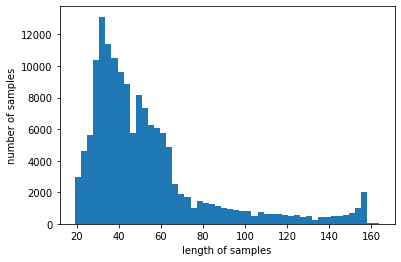

In [ ]:
# 문장의 길이 구하기
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in train_utterance))
print('리뷰의 평균 길이 :',sum(map(len, train_utterance))/len(train_utterance))
plt.hist([len(s) for s in train_utterance], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# padding의 max length 설정
MAX_LEN = 160

In [ ]:
# 토큰 적용, 인덱스 변경, 패딩 함수
from keras.preprocessing.sequence import pad_sequences
from transformers import BertModel, BertTokenizer
def tokenize(dataset):
  # 입력 토큰의 최대 시퀀스 길이
  tokenized_utterance = [ str(sentence) for sentence in dataset ]
  # token화 하기
  tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
  tokenized_utterance = [tokenizer.tokenize(sent) for sent in tokenized_utterance]
  # 인덱스로 변환하기 
  ids_utterance = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_utterance] 
  # 패딩 채우기
  ids_utterance = pad_sequences(ids_utterance, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
  return ids_utterance

In [ ]:
# 함수 함수
token_train_utterance = tokenize(train_utterance)
token_dev_utterance = tokenize(dev_utterance)

In [ ]:
# 어텐션 마스크 
# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
def mask_func(masklist, targetdata):
  for seq in targetdata:
    seq_mask = [float(i>0) for i in seq]
    masklist.append(seq_mask)
  print(masklist[0])

In [ ]:
# train과 dev data에 대해서 mask attention 적용 
masks_train_utterance = []
masks_dev_utterance = []
mask_func(masks_train_utterance, token_train_utterance) 
mask_func(masks_dev_utterance, token_dev_utterance)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
"""
import pandas as pd
df = pd.DataFrame(friendsdata_train_dict, columns= ['utterance'])
df_list = df.values.tolist()
"""

In [ ]:
# 데이터에 tensor 적용
from keras.preprocessing.sequence import pad_sequences
from transformers import BertModel, BertTokenizer

class Dataset():
  def __init__(self, x, y, z):
    self.utterance = x
    self.emotion = y
    self.mask = z
 
  def __len__(self): 
    return len(self.utterance)

  def __getitem__(self, idx):
    input_tensor = torch.tensor(self.utterance[idx])
    labels_tensor = torch.tensor(self.emotion[idx])
    mask_tensor = torch.tensor(self.mask[idx])
    return input_tensor,labels_tensor, mask_tensor

In [ ]:
train_dataset = Dataset(token_train_utterance, train_emotion, masks_train_utterance)
dev_dataset = Dataset(token_dev_utterance, dev_emotion, masks_dev_utterance)

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
dev_dataloader = DataLoader(dev_dataset, batch_size=32, shuffle=True)

**Test dataset**

In [ ]:
# test dataset load
import csv
dialogs = []

with open('ko_data.csv', newline='', encoding='cp949') as csvfile:
  dataread = csv.reader(csvfile)
  for i,row in enumerate(dataread):
    if i!=0:
      dialogs.append([row[0], row[1]])

# test data frame load
df_test = pd.DataFrame(dialogs, columns=['Id','Sentence'])
test_Id = df_test['Id'].values.tolist()
test_utterance = df_test['Sentence'].values.tolist()

In [ ]:
# tag cls, sep, pad 넣기
token_input(test_utterance)

In [ ]:
token_test_utterance = tokenize(test_utterance)

In [ ]:
 # test mask id 생성
masks_test_utterance = []
mask_func(masks_test_utterance, token_test_utterance) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# test 데이터를 텐서로 변환
test_inputs = torch.tensor(token_test_utterance)
test_masks = torch.tensor(masks_test_utterance)

##### **Hyper-parameters**

In [ ]:
pretrained_weights = 'bert-base-multilingual-cased'
learning_rate = 2e-5 # 1e-5
n_epoch = 2

##### **Model**

In [ ]:
import torch.nn as nn
from transformers import BertModel, BertTokenizer

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.bert_model = BertModel.from_pretrained(pretrained_weights, num_labels=2)
    self.linear = torch.nn.Linear(768, 2) 

  def forward(self, input_tensor, input_mask):
    hidden_tensor = self.bert_model(input_tensor,attention_mask=input_mask)[0] # (bat, len, hid)
    hidden_tensor = hidden_tensor[:, 0, :] # (bat, hid)
    logit = self.linear(hidden_tensor)
    return logit

##### **Evaluation Metrics**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(true_list, pred_list):
  print(pred_list)
  print(true_list)
  precision = precision_score(true_list, pred_list, average=None)
  recall = recall_score(true_list, pred_list, average=None)
  micro_f1 = f1_score(true_list, pred_list, average='micro')

  # 출력 로짓과 라벨을 비교하여 정확도 계산
  eval_accuracy = flat_accuracy(pred_list, true_list)
  print('precision: ', ['%.4f' % v for v in precision])
  print('recall:\t\t', ['%.4f' % v for v in recall])
  print('micro_f1: %.6f' % micro_f1)
  print("Accuracy: {0:.2f}".format(eval_accuracy))

##### **Training**

In [ ]:
# GPU 디바이스 이름 구함
import tensorflow as tf
device_name = tf.test.gpu_device_name()

# GPU 디바이스 이름 검사
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
# 디바이스 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


In [ ]:
"""
n_epoch = 2
for i_epoch in range(0, n_epoch):
  for batch_idx, batch_data in enumerate(dev_dataloader): 
    b_input_ids, b_labels, b_input_mask = batch_data
    print(b_input_ids.size()) # torch.Size([32, 160])
    print(b_labels.size())  # torch.Size([32])
    print(b_input_mask.size()) #torch.Size([32, 160])
"""    

'\nn_epoch = 2\nfor i_epoch in range(0, n_epoch):\n  for batch_idx, batch_data in enumerate(dev_dataloader): \n    b_input_ids, b_labels, b_input_mask = batch_data\n    print(b_input_ids.size()) # torch.Size([32, 160])\n    print(b_labels.size())  # torch.Size([32])\n    print(b_input_mask.size()) #torch.Size([32, 160])\n'

In [ ]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    pred_flat = preds.flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
from tqdm import tqdm_notebook # tqdm_notebook 진행 표시바
import numpy as np
 
batch_size=32
model = Model() #정의된 모델 수행
model.cuda()
criterion = torch.nn.CrossEntropyLoss() # LogSoftmax & NLLLoss, tf.nn.weighted_cross_entropy_with_logits
#class_weight = torch.FloatTensor(weights).cuda()
#criterion = torch.nn.CrossEntropyLoss(weight = class_weight)
optimizer = torch.optim.Adam(model.parameters(), learning_rate) #gradient descent 알고리즘 : Adam

for i_epoch in range(n_epoch + 1):
  print('i_epoch:', i_epoch)
  train_loss = 0 
  model.train()
  for batch_idx, batch_data in enumerate(train_dataloader): 

    # 배치를 GPU에 넣음
    batch_data = tuple(t.to(device) for t in batch_data)
    
    # 배치에서 데이터 추출
    b_input_ids, b_labels, b_input_mask = batch_data

    # 배치에서 데이터 추출
    logit = model(b_input_ids, b_input_mask)
    batch_loss = criterion(logit, b_labels)
    train_loss += batch_loss.item()
    
    model.zero_grad()
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  #시작 시간 설정
  t0 = time.time()

  # 평가모드로 변경
  bert_predicted = []
  all_logits = []
  model.eval()
  pred_list, true_list = np.array([]), np.array([])
  if torch.cuda.is_available():
    for batch_idx, batch_data in enumerate(dev_dataloader):
      # 배치를 GPU에 넣음
      batch_data = tuple(t1.to(device) for t1 in batch_data)
      # 배치에서 데이터 추출
      b_input_ids, b_labels, b_input_mask = batch_data
      logit = model(b_input_ids, b_input_mask)
      _, max_idx = torch.max(logit, dim=-1) # tensor
    
      numpy_max_idx = max_idx.detach().cpu().numpy() 
      b_labels = b_labels.detach().cpu().numpy() 

      pred_list = np.append(pred_list, numpy_max_idx)
      true_list = np.append(true_list, b_labels)
    
  evaluate(pred_list, true_list) # print results

i_epoch: 0
[1. 1. 0. ... 0. 0. 1.]
[0. 0. 0. ... 1. 0. 0.]
precision:  ['0.8365', '0.8755']
recall:		 ['0.8689', '0.8445']
micro_f1: 0.856180
Accuracy: 0.86
i_epoch: 1
[0. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
precision:  ['0.8390', '0.8975']
recall:		 ['0.8898', '0.8497']
micro_f1: 0.868460
Accuracy: 0.87
i_epoch: 2
[0. 0. 1. ... 0. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
precision:  ['0.8425', '0.8961']
recall:		 ['0.8889', '0.8522']
micro_f1: 0.869480
Accuracy: 0.87


##### **Labeling**


In [ ]:
# 문장 테스트
def test_sentences(inputs, masks):
    
    # 평가모드로 변경
    model.eval()

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)

    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, b_input_mask)
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    #logits = logits.detach().cpu().numpy()
    
    return logits

In [ ]:
pred_label=[]
for i in range(len(test_inputs)):
  input_id = test_inputs[i].unsqueeze(0)
  input_mask =  test_masks[i].unsqueeze(0)
  logits = test_sentences(input_id,input_mask)
  _, max_idx = torch.max(logits, dim=-1) # tensor
  pred_emotion = max_idx.tolist()
  pred_label.append(pred_emotion)

In [ ]:
df = pd.DataFrame(df_test, columns=['Id'])
df['Predicted'] = pred_label
print(df)

          Id  Predicted
0          0          1
1          1          0
2          2          0
3          3          1
4          4          0
...      ...        ...
11182  11182          1
11183  11183          0
11184  11184          1
11185  11185          1
11186  11186          0

[11187 rows x 2 columns]


In [ ]:
df.to_csv("test_naver_sentiment.csv", sep=",",index=False)